# Import Library

In [6]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow import keras
from tensorflow.keras import layers,optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import tensorflow.keras.datasets as tfds

import warnings
warnings.filterwarnings('ignore')

# Regression-DNN

In [7]:
x = np.array([1,2,3,4,5,6], dtype=float)
y = np.array([2,3,4,8,10,12], dtype=float)

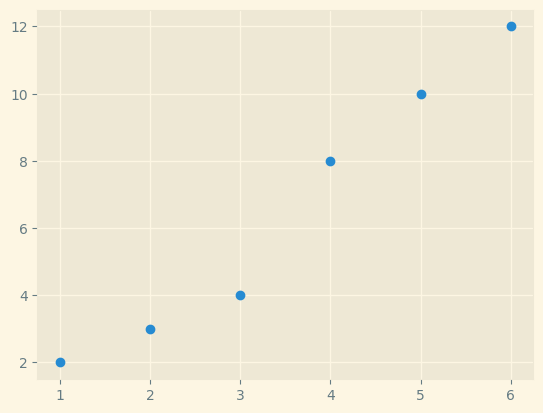

In [8]:
plt.style.use('Solarize_Light2')

plt.scatter(x, y)
plt.show()

### Buat Sequential Model

In [10]:
model = tf.keras.Sequential([
   tf.keras.layers.Dense(units=1, input_shape=[1])
])

### Modeling 

In [20]:
# bangun arsitekturnya
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

In [21]:
# Konfigurasi model
model.compile(optimizer='adam', loss='mae')

In [24]:
# Pelatihan model
model.fit(
    x = x, y = y,
    epochs=600, #perulangan model
    steps_per_epoch=10
)

Epoch 1/600
10/10 [==============================] - 0s 999us/step - loss: 1.3639
Epoch 2/600
10/10 [==============================] - 0s 2ms/step - loss: 1.5937
Epoch 3/600
10/10 [==============================] - 0s 2ms/step - loss: 1.4154
Epoch 4/600
10/10 [==============================] - 0s 3ms/step - loss: 1.4443
Epoch 5/600
10/10 [==============================] - 0s 3ms/step - loss: 1.3987
Epoch 6/600
10/10 [==============================] - 0s 2ms/step - loss: 1.4760
Epoch 7/600
10/10 [==============================] - 0s 3ms/step - loss: 1.3673
Epoch 8/600
10/10 [==============================] - 0s 4ms/step - loss: 1.5432
Epoch 9/600
10/10 [==============================] - 0s 3ms/step - loss: 1.3551
Epoch 10/600
10/10 [==============================] - 0s 3ms/step - loss: 1.4497
Epoch 11/600
10/10 [==============================] - 0s 4ms/step - loss: 1.4056
Epoch 12/600
10/10 [==============================] - 0s 2ms/step - loss: 1.3586
Epoch 13/600
10/10 [===============

# MNIST

### Load Data

In [26]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.mnist.load_data()

In [28]:
print(f'panjang x train: {len(x_train_raw)}',
f'panjang y train: {len(y_train_raw)}',
f'panjang x test: {len(x_test_raw)}',
f'panjang y test: {len(y_test_raw)}',
sep='\n'
)

panjang x train: 60000
panjang y train: 60000
panjang x test: 10000
panjang y test: 10000


### Preview Gambar 

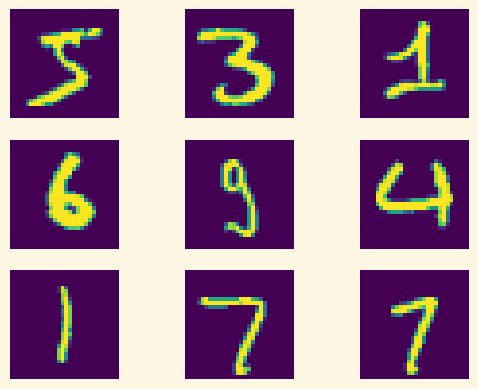

In [32]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i*12])
    plt.axis('off')
plt.show()

### Label Encoding 

In [29]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

### Reshape x_train dan y_train

In [31]:
x_train = tf.reshape(x_train_raw,[60000, 784])
x_test = tf.reshape(x_test_raw,[10000, 784])

In [33]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

### Membuat Model 

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),#layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(
   optimizer='adam',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

### Training Model 

In [41]:
history = model.fit(
    x_train, y_train,
    epochs = 25, 
    steps_per_epoch = 5,
    verbose = 1 ,
    validation_data=(x_test, y_test)
)

Epoch 1/25
5/5 [==============================] - 3s 281ms/step - loss: 2.2155 - accuracy: 0.2063 - val_loss: 2.0740 - val_accuracy: 0.3182
Epoch 2/25
5/5 [==============================] - 1s 172ms/step - loss: 1.9998 - accuracy: 0.3672 - val_loss: 1.8514 - val_accuracy: 0.4743
Epoch 3/25
5/5 [==============================] - 1s 158ms/step - loss: 1.7739 - accuracy: 0.5111 - val_loss: 1.6149 - val_accuracy: 0.5983
Epoch 4/25
5/5 [==============================] - 1s 164ms/step - loss: 1.5402 - accuracy: 0.6162 - val_loss: 1.3819 - val_accuracy: 0.6843
Epoch 5/25
5/5 [==============================] - 1s 146ms/step - loss: 1.3101 - accuracy: 0.6995 - val_loss: 1.1591 - val_accuracy: 0.7497
Epoch 6/25
5/5 [==============================] - 1s 192ms/step - loss: 1.0972 - accuracy: 0.7599 - val_loss: 0.9638 - val_accuracy: 0.7988
Epoch 7/25
5/5 [==============================] - 1s 246ms/step - loss: 0.9160 - accuracy: 0.8013 - val_loss: 0.8075 - val_accuracy: 0.8275
Epoch 8/25
5/5 [====

### History Training

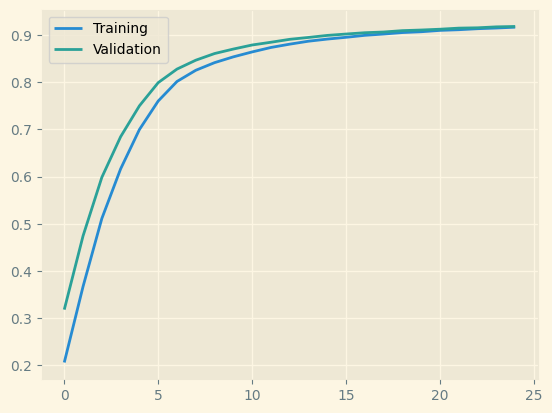

In [42]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

### Evaluasi Model

In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2930 - accuracy: 0.9177


[0.2930106818675995, 0.9176999926567078]

### Save Model

In [44]:
model.save('SavedModels/models.h5')

### Load Model

In [45]:
model_saved = tf.keras.models.load_model('SavedModels/models.h5')
model_saved.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 2s 4ms/step - loss: 0.2930 - accuracy: 0.9177


[0.2930106818675995, 0.9176999926567078]

### Prediksi Model 

In [65]:
hasil = model_saved.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [66]:
x_test.shape

TensorShape([10000, 784])

In [67]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [57]:
hasil.shape

(60000, 10)

In [59]:
tf.argmax(hasil[22]).numpy()

9

In [60]:
hasil[22]

array([0.00090445, 0.00449576, 0.00791383, 0.0059771 , 0.19644396,
       0.00628739, 0.00126089, 0.06587671, 0.05092622, 0.6599137 ],
      dtype=float32)

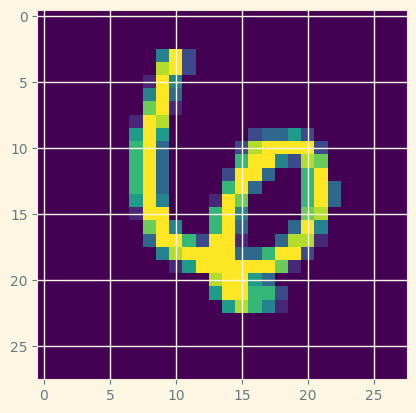

In [70]:
plt.imshow(x_test_raw[22])